# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
# Code Here
!pip install palmerpenguins

In [2]:
!pip install plotnine

In [3]:
!pip install scikit-learn

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from plotnine import *

penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

NameError: name 'load_penguins' is not defined

Let's use the other variables to predict bill_depth_mm. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

Four different models, each containing a different set of predictor variables
Create a plot like the right plot of Fig 1. in our Model Validation chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [7]:
# Building the full explanatory and predictor list and dummifying
y = penguins.bill_depth_mm
X_all = pd.get_dummies(
    penguins[['species','body_mass_g', 'island', 'flipper_length_mm', 'bill_length_mm', 'sex', 'year']],
    columns=['species', 'island', 'sex'],
    drop_first=True
)

# Splitting data into training and testing
yt, yv, Xt, Xv = train_test_split(y, X_all, test_size=0.2, random_state=42)

In [8]:
# IDing the dummy columns to include
species_columns = [col for col in X_all.columns if col.startswith('species_')]
island_columns = [col for col in X_all.columns if col.startswith('island_')]
sex_columns = [col for col in X_all.columns if col.startswith('sex_')]

# Defining the different models
models = {
    'Model 1 (all predictors)': list(X_all.columns),
    'Model 2 (Species, Body Mass (g), and Flipper Length)': species_columns + ['body_mass_g', 'flipper_length_mm'],
    'Model 3 (Bill Length and Flipper Length)': ['bill_length_mm', 'flipper_length_mm'],
    'Model 4 (Body Mass (g), Island, and Flipper Length)': island_columns + ['body_mass_g', 'flipper_length_mm']
}

# Fitting the models
rows = []
# Iterating through the models to fit each model based on the different predictors
for model_name, model_columns in models.items():
  model = LinearRegression().fit(Xt[model_columns], yt)
  rows.append({
      'Model': model_name, # appending model name
      # predicting values based on the model and extraining MSE of training data
      'Training Score': mean_squared_error(yt, model.predict(Xt[model_columns])),
      # predicting values based on the model and extraining MSE of testing data
      'Validation Score': mean_squared_error(yv, model.predict(Xv[model_columns])),
      'Flexibility': len(model_columns) # number of columns in model
  })

results = pd.DataFrame(rows)
results


,Model,Training Score,Validation Score,Flexibility
0,Model 1 (all predictors),0.529104,0.895856,9
1,"Model 2 (Species, Body Mass (g), and Flipper L...",0.665424,1.003254,4
2,Model 3 (Bill Length and Flipper Length),2.323142,2.852803,2
3,"Model 4 (Body Mass (g), Island, and Flipper Le...",1.839814,2.702801,4


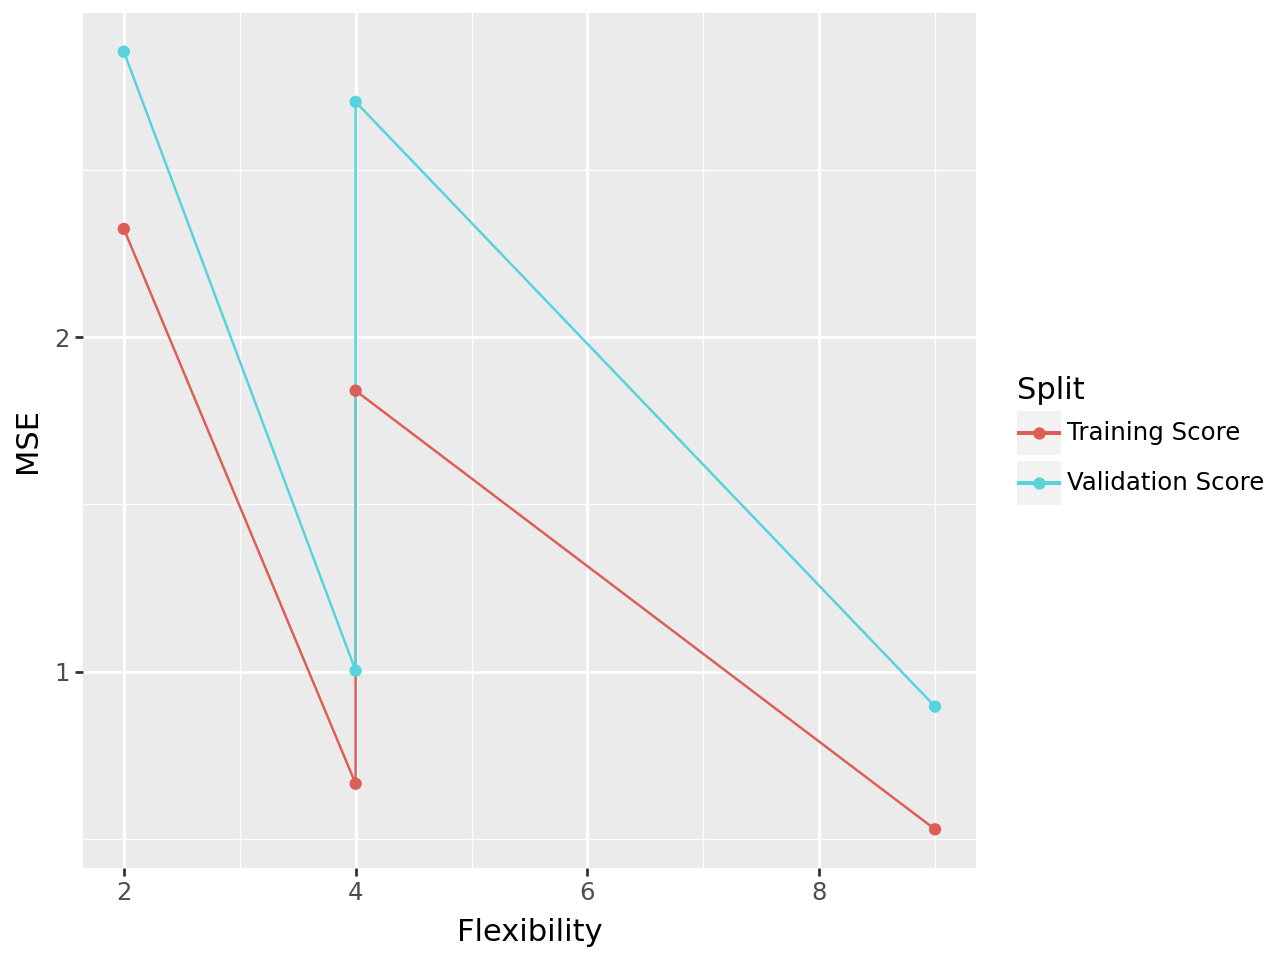

In [9]:
# Defining baseline to always predict training mean
baseline = mean_squared_error(yt, [yt.mean()] * len(yt))

# Plotting
plotting = results.melt(id_vars=['Model', 'Flexibility'], value_vars=['Training Score', 'Validation Score'], var_name='Split', value_name='MSE')

(ggplot(plotting, aes(x='Flexibility', y='MSE', color='Split'))
 + geom_line()
 + geom_point()
)

Evidently, we see that the model with the most amount of predictors has the lowest training and validation MSE, performing the best and was able to capture the deviation of bill depth in mm the best. This makes sense, as with more predictor variables, the better fit the model will be, and the lower the model error will be.
